# Homework Assignment 2

## Section 1: Admissions Dataset

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
# Note: you may need to adjust the path to the dataset below
admissions = pd.read_csv('../data/dataset-ucla-admissions.csv')
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [112]:
admissions.dropna(subset=['gre', 'gpa','prestige'], inplace=True)
admissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


>**Question 1:**

>What is the target / outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables.

In [113]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


The Target or outcome variable is dependent upon the independent variable, so that would be the admit variable. It would seem that the gre and the gpa are both continuous and the prestige is the categorical variable. I'm guessing the null accuracy to be the prediction if you always went with whatever is the majority class.

In [114]:
prestige = pd.get_dummies(admissions['prestige'])

In [115]:
prestige.head()

,1.0,2.0,3.0,4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [116]:
admissions = pd.concat([admissions,prestige],axis=1)

In [117]:
admissions.head()

,admit,gre,gpa,prestige,1.0,2.0,3.0,4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


>**Question 2:**

>What do you think is the goal of using machine learning with this dataset?

I think the goal would be to uncover bias or understand whether someone has a chance of getting accepted or denied. 

>**Question 3:** 

>Make a scatter plot of gpa vs gre, color-encoded using the admit feature. What does this graph tell you?

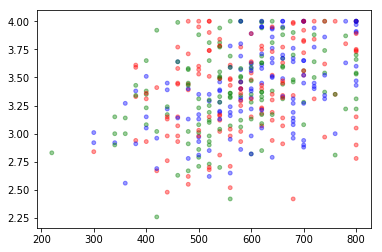

In [118]:
X = admissions.gre
y = admissions.gpa
z = admissions.admit


plt.scatter(X,y, color = ['red','green','blue'],alpha=.4, s=15)
plt.show()


The graph shows some seeming randomness but a clear line that indicates that the higher your gpa and gre, the more likely that you are to be accepted. 

>**Question 4:** 

>1. Split the data between a train and test set, with 25% of the data for testing.
>2. Fit a Logistic Regression model on the training data.
>3. Evaluate the model on both the training and testing datasets using the area under the ROC curve.
>4. What's the difference in the AUC score of the training and testing datasets? Is this evidence of overfitting?

In [119]:
train, test = train_test_split(admissions, test_size=.25)

In [120]:
logreg = LogisticRegression()

In [109]:
logreg.fit(train, test)

ValueError: bad input shape (100, 8)

>**Question 5:** 

>Build a KNN model and a Random Forest model trained on this dataset. What's the cross validation score for each? Use roc_auc as your evaluation metric.

>**Question 6:** 

> What do false positives and false negatives represent in the context of this model? If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

>**Question 7:** 

>Using the Logistic Regression model from Question 4, what is the probability of admission of the following prospective students:

>- Student 1: $GRE = 560$, $GPA = 3.6$, $Prestige = 2$
>- Student 2: $GRE = 750$, $GPA = 3.8$, $Prestige = 4$
>- Student 3: $GRE = 660$, $GPA = 3.1$, $Prestige = 1$

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset meaning that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't actually related to anything having to do with San Francisco.

In this section, we want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk. Your task is to find the good ones while dropping the bad ones.

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [ ]:
data = pd.read_csv('../data/homework_2_data.csv', index_col=[0])
data.head()